#### prof. Davi Rocha

## Acessando dados de ações 

### Introdução

O objetivo é acessar uma base de dados financeiros usando o yahoo finanças e fazer as primeiras estatísticas e gráficos.

### Importação de bibliotecas

In [46]:
import pandas as pd  #para manipular dataframes
import numpy as np  # para calculos numéricos/estatisticos/matematicos

from pandas_datareader import data  #para baixar dados da internet
import matplotlib.pyplot as plt  #para graficos padrao
import seaborn as sns #graficos mais atraentes 


Vamos aqui fazer uma importação de dados financeiros usando o yahoo finanças

### Base de dados de uma ação

Vamos aqui baixar dados de apenas uma ação. Vamos acessar as ações da Magazine Luiza.
Os dados serão acessados do site https://br.financas.yahoo.com/  

Especificamente, essa base pode ser encontrada aqui: https://br.financas.yahoo.com/quote/MGLU3.SA?p=MGLU3.SA&.tsrc=fin-srch


 

In [47]:
#dados de ações da Magazine Luiza no site do yahoo finanças a partir de jan/2015
luiza_df = data.DataReader(name='MGLU3.SA', data_source='yahoo', start='2015-01-01')

In [48]:
#Visualização dos dados

luiza_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,0.243750,0.231562,0.243750,0.232812,6323200.0,0.215415
2015-01-05,0.240625,0.229687,0.235625,0.237187,10326400.0,0.219463
2015-01-06,0.238437,0.233125,0.238437,0.234062,12572800.0,0.216571
2015-01-07,0.242187,0.234687,0.237500,0.241875,6454400.0,0.223800
2015-01-08,0.242187,0.237500,0.239375,0.240000,8393600.0,0.222066
...,...,...,...,...,...,...
2021-01-21,25.650000,24.850000,25.400000,25.490000,33038900.0,25.490000
2021-01-22,26.299999,25.100000,25.129999,26.000000,33782100.0,26.000000
2021-01-26,27.070000,25.670000,26.250000,25.750000,44474300.0,25.750000


Observe que pelas informações acima temos 1505 preços de ações e 6 colunas. Vamos entender as colunas analizando a linha do dia 2 de janeiro.

O preço de abertura da ação nesse dia foi de R$ 0.243750. 

O preço de fechamento foi R$ 0.232812

A ação no dia atingiu a máxima de R$ 0.243750

E atingiu a mínima de R$ 0.231562

Volume é a quantidade de ações negociadas no dia, no dia 2 tivemos 6.323.200 ações.

O fechamento ajustado é o preço de fechamento após os ajustes para todos os desdobramentos e distribuições de dividendos aplicáveis. 

In [50]:
luiza_df.info() #informações sobre os tipos de dados
#Observe que todos são continuos e que não há valores nulos

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1506 entries, 2015-01-02 to 2021-01-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1506 non-null   float64
 1   Low        1506 non-null   float64
 2   Open       1506 non-null   float64
 3   Close      1506 non-null   float64
 4   Volume     1506 non-null   float64
 5   Adj Close  1506 non-null   float64
dtypes: float64(6)
memory usage: 82.4 KB


In [51]:
luiza_df.head() # ver 5 primeiras linhas

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,0.243750,0.231562,0.243750,0.232812,6323200.0,0.215415
2015-01-05,0.240625,0.229687,0.235625,0.237187,10326400.0,0.219463
2015-01-06,0.238437,0.233125,0.238437,0.234062,12572800.0,0.216571
2015-01-07,0.242187,0.234687,0.237500,0.241875,6454400.0,0.223800
2015-01-08,0.242187,0.237500,0.239375,0.240000,8393600.0,0.222066


In [52]:
luiza_df.tail()  # 5 ultimas linhas

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-21,25.650000,24.850000,25.400000,25.490000,33038900.0,25.490000
2021-01-22,26.299999,25.100000,25.129999,26.000000,33782100.0,26.000000
2021-01-26,27.070000,25.670000,26.250000,25.750000,44474300.0,25.750000
2021-01-27,26.389999,25.350000,25.719999,26.180000,34797100.0,26.180000
2021-01-28,26.070000,25.389999,25.870001,25.959999,12046800.0,25.959999


In [53]:
luiza_df.describe()  # estatisticas dos 5  numeros, media e desvio padrao

,High,Low,Open,Close,Volume,Adj Close
count,1506.000000,1506.000000,1506.000000,1506.000000,1.506000e+03,1506.000000
mean,5.525381,5.300631,5.415150,5.416609,4.460031e+07,5.331361
std,7.186460,6.905499,7.047692,7.050316,3.342848e+07,7.021804
min,0.031757,0.030390,0.031445,0.030585,0.000000e+00,0.029213
25%,0.215781,0.206094,0.209004,0.212813,2.478480e+07,0.199041
50%,2.515937,2.420156,2.475781,2.465937,3.735840e+07,2.375753
75%,7.791406,7.404531,7.578125,7.560000,5.450050e+07,7.369948
max,28.309999,26.740000,28.150000,27.450001,4.304640e+08,27.421442


Perguntas:

Em quais datas ocorreram o máximo e minimo de fechamento apontadas acima?

In [54]:
#Maximo:
luiza_df[luiza_df['Close']==luiza_df['Close'].max()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-05,27.700001,26.74,26.879999,27.450001,46382700.0,27.421442


In [55]:
#Minimo:
luiza_df[luiza_df['Close']==luiza_df['Close'].min()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-14,0.031757,0.03039,0.031445,0.030585,78899200.0,0.029213


Há dados nulos?

In [56]:
luiza_df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [57]:
#formato

luiza_df.shape

(1506, 6)

### Visualização dos dados de fechamento


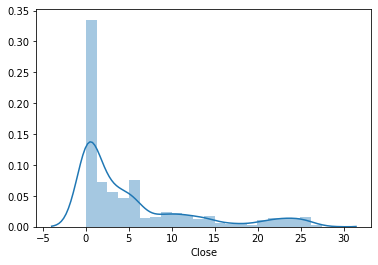

In [58]:
sns.distplot(luiza_df['Close'])
plt.show()

Perceba que a distribuição é assimétrica a direita, logo a média é maior que a mediana devido aos valores extremos. O melhor representante dos dados seria a mediana e o boxplot pode nos mostrar se esses valores extremos são outliers.
Vejamos:

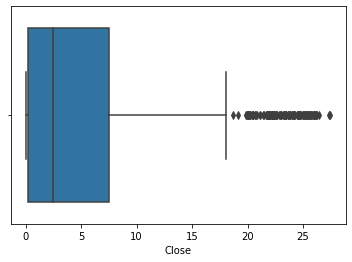

In [60]:
sns.boxplot(luiza_df['Close'])
plt.show()

Veja como o boxplot mostra que os valores de fechamento dessa ação se concentram aproximadamente abaixo de R$7,00 assim como observamos também no histograma.

Era isso que eu queria mostrar. Espero que seja útil!

**Keep calm and analysing data!**